In [2]:
# import CIFAR-10 dataset from HuggingFace
from datasets import load_dataset

dataset_train = load_dataset(
    'cifar10',
    split='train', # training dataset
    ignore_verifications=True  # set to True if seeing splits Error
)

dataset_train

/home/muhiddin/miniconda3/envs/slt/lib/python3.6/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Dataset cifar10 downloaded and prepared to /home/muhiddin/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4. Subsequent calls will reuse this data.


Dataset({
    features: ['img', 'label'],
    num_rows: 50000
})

In [3]:
# check how many labels/number of classes
num_classes = len(set(dataset_train['label']))
num_classes

10

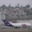

In [4]:
# let's view the image (it's very small)
dataset_train[0]['img']

In [5]:
# let's view the image (it's very small)
dataset_train[0]['label']

0

In [6]:
import torchvision.transforms as transforms

# image size
img_size = 32

# preprocess variable, to be used ahead
preprocess = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor()
])

In [8]:
from tqdm.auto import tqdm

inputs_train = []

for record in tqdm(dataset_train):
    image = record['img']
    label = record['label']

    # convert from grayscale to RGB
    if image.mode == 'L':
        image = image.convert("RGB")
        
    # prepocessing
    input_tensor = preprocess(image)
    
    # append to batch list
    inputs_train.append([input_tensor, label]) 

  0%|          | 0/50000 [00:00<?, ?it/s]

100%|██████████| 50000/50000 [00:23<00:00, 2143.12it/s]


In [9]:
print(len(inputs_train), inputs_train[0][0].shape)

50000 torch.Size([3, 32, 32])


In [10]:
mean = [0.4670, 0.4735, 0.4662]
std = [0.2496, 0.2489, 0.2521]

In [11]:
preprocess = transforms.Compose([
    transforms.Normalize(mean=mean, std=std)
])

for i in tqdm(range(len(inputs_train))):
    # prepocessing
    input_tensor = preprocess(inputs_train[i][0])
    # replace with normalized tensor
    inputs_train[i][0] = input_tensor

100%|██████████| 50000/50000 [00:02<00:00, 18507.93it/s]


In [18]:
inputs_train[i][0]

tensor([[[-8.9689e-01, -9.1260e-01, -9.2831e-01,  ..., -8.6546e-01,
          -5.8266e-01, -8.9689e-01],
         [-8.9689e-01, -8.8117e-01, -9.1260e-01,  ..., -6.6121e-01,
          -7.9893e-02, -8.6546e-01],
         [-8.1833e-01, -6.4550e-01, -6.4181e-02,  ..., -2.9985e-01,
          -1.3355e-03, -8.8117e-01],
         ...,
         [ 6.5854e-01,  6.2712e-01,  6.2712e-01,  ...,  5.1714e-01,
           5.9570e-01,  5.7999e-01],
         [ 6.8997e-01,  6.5854e-01,  6.7426e-01,  ...,  6.7426e-01,
           6.5854e-01,  6.5854e-01],
         [ 7.8424e-01,  7.5281e-01,  7.5281e-01,  ...,  7.5281e-01,
           7.5281e-01,  7.5281e-01]],

        [[-1.0358e+00, -1.0358e+00, -1.0358e+00,  ..., -9.8855e-01,
          -7.2070e-01, -1.0358e+00],
         [-1.0201e+00, -1.0831e+00, -1.1461e+00,  ..., -8.1523e-01,
          -2.1652e-01, -1.0043e+00],
         [-9.7279e-01, -9.2552e-01, -4.3710e-01,  ..., -4.5286e-01,
          -1.5350e-01, -1.0201e+00],
         ...,
         [ 1.1227e+00,  1

In [19]:
dataset_val = load_dataset(
    'cifar10',
    split='test',  # test set (used as validation set)
    ignore_verifications=False  # set to True if seeing splits Error
)

Reusing dataset cifar10 (/home/muhiddin/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


https://github.com/pinecone-io/examples/blob/master/learn/search/image/image-retrieval-ebook/cnn/cifar10.ipynb

In [23]:
# check how many labels/number of classes
num_classes1 = len(set(dataset_val['label']))
num_classes1

10

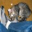

In [24]:
# let's view the image (it's very small)
dataset_val[0]['img']

In [26]:
import torchvision.transforms as transforms

# image size
img_size = 32

# preprocess variable, to be used ahead
preprocess = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor()
])

In [27]:
from tqdm.auto import tqdm

inputs_val = []

for record in tqdm(dataset_val):
    image = record['img']
    label = record['label']

    # convert from grayscale to RGB
    if image.mode == 'L':
        image = image.convert("RGB")
        
    # prepocessing
    input_tensor = preprocess(image)
    
    # append to batch list
    inputs_val.append([input_tensor, label]) 

100%|██████████| 10000/10000 [00:04<00:00, 2238.93it/s]


In [28]:
print(len(inputs_val), inputs_val[0][0].shape)

10000 torch.Size([3, 32, 32])


In [29]:
preprocess = transforms.Compose([
    transforms.Normalize(mean=mean, std=std)
])

for i in tqdm(range(len(inputs_val))):
    # prepocessing
    input_tensor = preprocess(inputs_val[i][0])
    # replace with normalized tensor
    inputs_val[i][0] = input_tensor

100%|██████████| 10000/10000 [00:00<00:00, 26144.58it/s]


In [31]:
import torch
batch_size = 64

# add to dataloaders
dloader_train = torch.utils.data.DataLoader(
  	inputs_train,
    batch_size=batch_size,
    shuffle=True
)

dloader_val = torch.utils.data.DataLoader(
  	inputs_val,
    batch_size=batch_size,
    shuffle=False
)

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

In [34]:
# creating a CNN class
class ConvNeuralNet(nn.Module):
	#  determine what layers and their order in CNN object 
    def __init__(self, num_classes):
        super(ConvNeuralNet, self).__init__()
        self.conv_layer1 = nn.Conv2d(in_channels=3, out_channels=64, kernel_size=4, padding=1)
        self.relu1 = nn.ReLU()
        self.max_pool1 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv_layer2 = nn.Conv2d(in_channels=64, out_channels=192, kernel_size=4, padding=1)
        self.relu2 = nn.ReLU()
        self.max_pool2 = nn.MaxPool2d(kernel_size=3, stride=2)

        self.conv_layer3 = nn.Conv2d(in_channels=192, out_channels=384, kernel_size=3, padding=1)
        self.relu3 = nn.ReLU()
        
        self.conv_layer4 = nn.Conv2d(in_channels=384, out_channels=256, kernel_size=3, padding=1)
        self.relu4 = nn.ReLU()

        self.conv_layer5 = nn.Conv2d(in_channels=256, out_channels=256, kernel_size=3, padding=1)
        self.relu5 = nn.ReLU()
        self.max_pool5 = nn.MaxPool2d(kernel_size=3, stride=2)
        
        self.dropout6 = nn.Dropout(p=0.5)
        self.fc6 = nn.Linear(1024, 512)
        self.relu6 = nn.ReLU()
        self.dropout7 = nn.Dropout(p=0.5)
        self.fc7 = nn.Linear(512, 256)
        self.relu7 = nn.ReLU()
        self.fc8 = nn.Linear(256, num_classes)
    
    # progresses data across layers    
    def forward(self, x):
        out = self.conv_layer1(x)
        out = self.relu1(out)
        out = self.max_pool1(out)
        
        out = self.conv_layer2(out)
        out = self.relu2(out)
        out = self.max_pool2(out)

        out = self.conv_layer3(out)
        out = self.relu3(out)

        out = self.conv_layer4(out)
        out = self.relu4(out)

        out = self.conv_layer5(out)
        out = self.relu5(out)
        out = self.max_pool5(out)
        
        out = out.reshape(out.size(0), -1)
        
        out = self.dropout6(out)
        out = self.fc6(out)
        out = self.relu6(out)

        out = self.dropout7(out)
        out = self.fc7(out)
        out = self.relu7(out)

        out = self.fc8(out)  # final logits
        return out

In [35]:
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
# set the model to device
model = ConvNeuralNet(num_classes).to(device)

In [36]:
# set loss function
loss_func = nn.CrossEntropyLoss()
# set learning rate 
lr = 0.008
# set optimizer as SGD
optimizer = torch.optim.SGD(
    model.parameters(), lr=lr
) 

In [37]:
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
		# load in the data in batches
    for i, (images, labels) in enumerate(dloader_train):  
        # move tensors to the configured device
        images = images.to(device)
        labels = labels.to(device)
        
        # forward propagation
        outputs = model(images)
        loss = loss_func(outputs, labels)
        
        # backward propagation and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
    # at end of epoch check validation loss and acc
    with torch.no_grad():
      	# switch model to eval (not train) model
        model.eval()
        correct = 0
        total = 0
        all_val_loss = []
        for images, labels in dloader_val:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            total += labels.size(0)
            # calculate predictions
            predicted = torch.argmax(outputs, dim=1)
            # calculate actual values
            correct += (predicted == labels).sum().item()
            # calculate the loss
            all_val_loss.append(loss_func(outputs, labels).item())
        # calculate val-loss
        mean_val_loss = sum(all_val_loss) / len(all_val_loss)
        # calculate val-accuracy
        mean_val_acc = 100 * (correct / total)
    print(
        'Epoch [{}/{}], Loss: {:.4f}, Val-loss: {:.4f}, Val-acc: {:.1f}%'.format(
            epoch+1, num_epochs, loss.item(), mean_val_loss, mean_val_acc
        )
    )

Epoch [1/50], Loss: 2.3063, Val-loss: 2.3007, Val-acc: 13.0%
Epoch [2/50], Loss: 2.3075, Val-loss: 2.2912, Val-acc: 13.7%
Epoch [3/50], Loss: 1.9427, Val-loss: 2.0315, Val-acc: 21.4%
Epoch [4/50], Loss: 1.8152, Val-loss: 2.3388, Val-acc: 13.8%
Epoch [5/50], Loss: 1.7177, Val-loss: 1.8383, Val-acc: 27.0%
Epoch [6/50], Loss: 1.6289, Val-loss: 1.7192, Val-acc: 33.3%
Epoch [7/50], Loss: 1.7480, Val-loss: 1.7005, Val-acc: 35.8%
Epoch [8/50], Loss: 1.4870, Val-loss: 1.5282, Val-acc: 41.0%
Epoch [9/50], Loss: 1.2998, Val-loss: 1.4386, Val-acc: 45.2%
Epoch [10/50], Loss: 1.3070, Val-loss: 1.5313, Val-acc: 42.6%
Epoch [11/50], Loss: 1.1706, Val-loss: 1.4472, Val-acc: 46.1%
Epoch [12/50], Loss: 0.7350, Val-loss: 1.3343, Val-acc: 51.4%
Epoch [13/50], Loss: 1.1087, Val-loss: 1.2340, Val-acc: 54.8%
Epoch [14/50], Loss: 0.9597, Val-loss: 1.1907, Val-acc: 57.6%
Epoch [15/50], Loss: 1.1769, Val-loss: 1.6758, Val-acc: 46.0%
Epoch [16/50], Loss: 0.7629, Val-loss: 1.0398, Val-acc: 62.8%
Epoch [17/50], Lo

In [38]:
# save to file
torch.save(model, 'cnn.pt')
# load from file and switch to inference mode
model = torch.load('cnn.pt')
model.eval()

ConvNeuralNet(
  (conv_layer1): Conv2d(3, 64, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (max_pool1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer2): Conv2d(64, 192, kernel_size=(4, 4), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (max_pool2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv_layer3): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu3): ReLU()
  (conv_layer4): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu4): ReLU()
  (conv_layer5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu5): ReLU()
  (max_pool5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout6): Dropout(p=0.5, inplace=False)
  (fc6): Linear(in_features=1024, out_features=512, bias=True)
  (relu6): ReLU()
  (dropout7): Dropout(p=0.5, inplace=False)
  (fc7): Linear(in_features=512, ou

# Inference

In [39]:
import torch

model = torch.load('cnn.pt')
# switch to evaluation mode and device
model.eval().to(device)
print(device)

cuda


In [40]:
# import CIFAR-10 dataset from HuggingFace
from datasets import load_dataset

data_test = load_dataset(
    'cifar10',
    split='test'  # test set
)
data_test

Reusing dataset cifar10 (/home/muhiddin/.cache/huggingface/datasets/cifar10/plain_text/1.0.0/447d6ec4733dddd1ce3bb577c7166b986eaa4c538dcd9e805ba61f35674a9de4)


Dataset({
    features: ['img', 'label'],
    num_rows: 10000
})

In [42]:
import torchvision.transforms as transforms

# image size
img_size = 32

# preprocess variable, to be used ahead
preprocess = transforms.Compose([
    transforms.Resize((img_size,img_size)),
    transforms.ToTensor()
])

In [43]:
input_tensors = []
for image in data_test['img'][:10]:
    tensor = preprocess(image)
    input_tensors.append(tensor.to(device))

In [44]:
# we have 10 tensors
len(input_tensors)

10

In [45]:
# all 32x32 dimensional with 3 color channels
input_tensors[0].shape

torch.Size([3, 32, 32])

In [46]:
# stack into a single tensor
input_tensors = torch.stack(input_tensors)
input_tensors.shape

torch.Size([10, 3, 32, 32])

In [47]:
# process through model to get output logits
outputs = model(input_tensors)
# calculate predictions
predicted = torch.argmax(outputs, dim=1)
predicted

tensor([8, 8, 3, 8, 3, 3, 3, 3, 3, 4], device='cuda:0')

In [48]:
predicted.shape

torch.Size([10])

In [49]:
# here are the class names
data_test.features['label'].names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [50]:
data_test[1]['label']

8

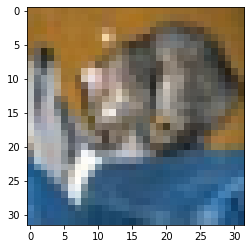

ship


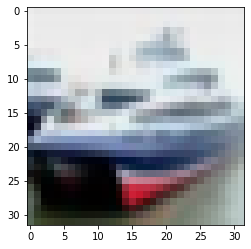

ship


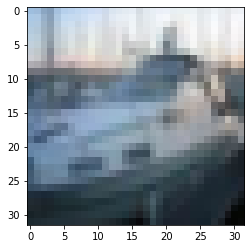

cat


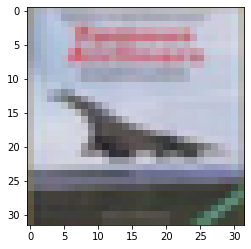

ship


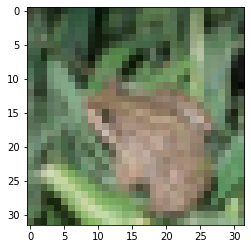

cat


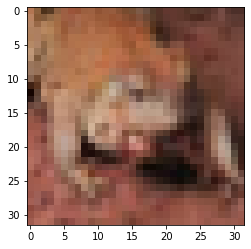

cat


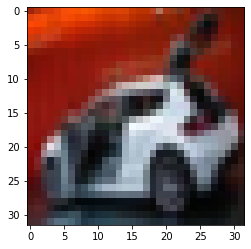

cat


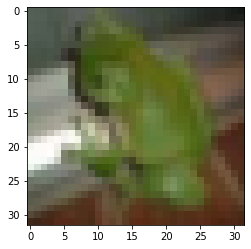

cat


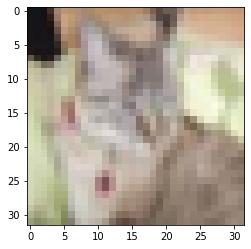

cat


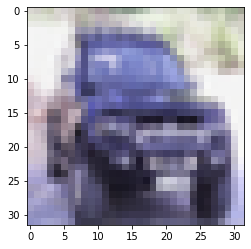

deer


In [52]:
import matplotlib.pyplot as plt

for i, image in enumerate(data_test['img'][:10]):
    plt.imshow(image)
    plt.show()
    print(data_test.features['label'].names[predicted[i]])